In [14]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# Function to create a quantum walk circuit on a cycle graph
def create_quantum_walk_circuit(num_qubits, num_steps):
    qc = QuantumCircuit(num_qubits)
    qc.h(0)
    # Define the coin and shift operators
    coin = QuantumCircuit(1)
    #coin.h(0)

    shift = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        shift.cx(i, (i + 1) % num_qubits)

    # Apply the coin and shift operators for the specified number of steps
    for _ in range(num_steps):
        for qubit in range(num_qubits):
            qc.append(coin, [qubit])
        qc.append(shift, range(num_qubits))

    # Measure all qubits
    qc.measure_all()

    return qc

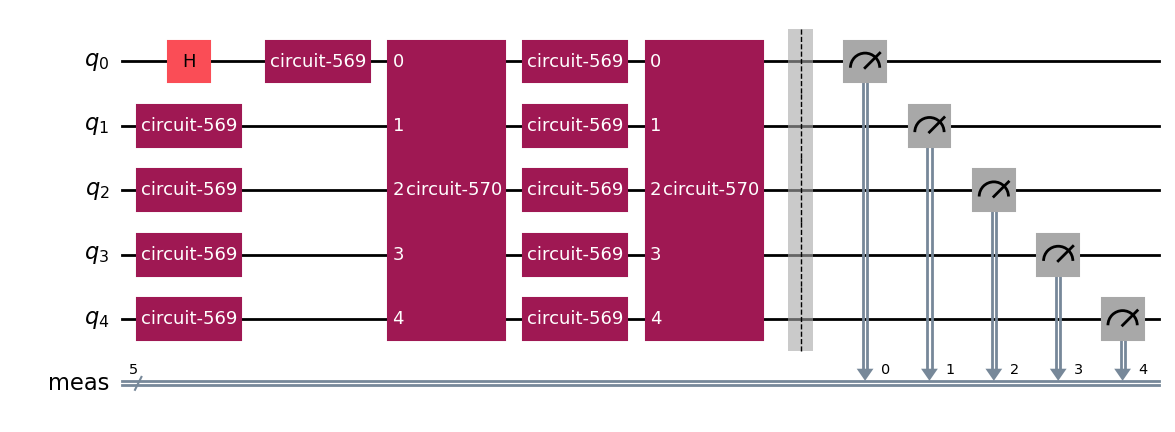

In [36]:
# Parameters
num_qubits = 5  # Number of qubits (nodes in the cycle graph)
num_steps = 2  # Number of steps for the quantum walk
# Create the quantum walk circuit
qc = create_quantum_walk_circuit(num_qubits, num_steps)
# Visualize the circuit
qc.draw('mpl')
plt.show()

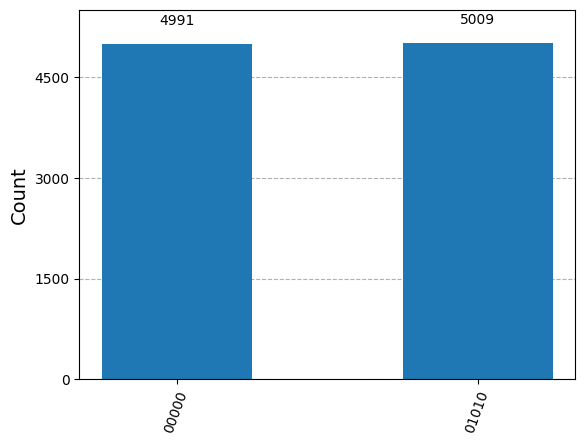

In [37]:
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=10000).result()
counts = result.get_counts(compiled_circuit)
plot_histogram(counts)
plt.show()